In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Acidentes e incidentes aeronáuticos do Brasil
Esta análise de dados tem como objetivos obter insights sobre os acidentes e incidentes aeronáuticos ocorridos no brasil nos últimos 10 anos.

# Importanto dados

In [4]:
acidentes = pd.read_csv('accidents.csv')

In [5]:
# Importando bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
# Para Notebooks
init_notebook_mode(connected=True)

from seaborn import countplot
from matplotlib.pyplot import figure, show

ModuleNotFoundError: No module named 'plotly'

# Visualisando dados importados

In [ ]:
acidentes.head()

# Verificando o nome das colunas
Nesse ponto é possível obervar as colunas com nome 'facto_*", que estão todas preenchidas com 'NÃO'. então vamos removê-las para facilitar a manipulação dos dados

In [ ]:
acidentes.columns

# Removendo colunas que não serão utilizadas e listando 

In [ ]:
lista = []
for i in range(1, 88):
    lista.append('fator_'+ str(i))
lista
acidentes.drop(columns=lista, inplace=True)

In [ ]:
acidentes.columns

# Quantidade de registros distintos em cada coluna

In [ ]:
acidentes.nunique()

# Análise de dados
Agora será feita a análise dos dados para que sejam respondidas as seguintes questões: 

1) Que tipo de classificação de ocorrência é mais comum e qual mais rara?

2) Quais os tipos de ocorrênca mais frequentes?

3) Quais estados teveram mais ocorrências?

4) Qual a quantidade de ocorrências por tipo de motor?

5) Quais as corrência mais aconteceram por tipo de Aeronave?

6) Quais as quantidades de ocorrências a cada ano? 

7) Quais fabricantes de aeronaves mais apresentam problemas?
 
 8) Quais segmentos da aviação que mais registram ocorrências?

9) Qual a quantidade de ocorrências por fase de voo?

# Classificação de ocorrências

In [ ]:
# Tipos de classificações existentes na base de dados
plt.style.use("ggplot")
print(acidentes['ocorrencia_classificacao'].unique())

# Podemos observar que incidentes, menos grave, são os tipos de ocorrência mais comum
print(acidentes['ocorrencia_classificacao'].value_counts())

#Visualizando melhor em um gráfico
acidentes['ocorrencia_classificacao'].value_counts().plot(kind='pie', subplots=True, label="Classificação de Acidentes" ,figsize=(6, 6))

# Tipos de Ocorrência

In [ ]:
# Tipos de ocorrências existentes na base de dados
print(acidentes['ocorrencia_tipo'].unique())

# Podemos observar que incidentes, menos grave, são os tipos de ocorrência mais comum
print(acidentes['ocorrencia_tipo'].value_counts())

In [ ]:
#Visualizando melhor em um gráfico os 10 principais tipos de ocorrência
plt.style.use("ggplot")
a = acidentes['ocorrencia_tipo'].value_counts()
a.head(10).plot(kind='barh', subplots=True, label="Tipos de ocorrência" ,figsize=(7, 7))
plt.xticks(rotation=80)
# Como podemos ver, falha do motor em voo é a principal ocorrência notifica.

In [ ]:
# Expondo as correlações entre as variáveis, podemos ver que apenas peso da aeronave e
# quantidade de assentos tem uma correlação significante
f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(acidentes.corr(), annot=True, fmt='.2f', ax=ax, linecolor='black', lw=.7)


# Quantidade e ocorrências por estado

In [ ]:
# São Paulo, por ter a maior quantidade de aeronaves, consequentemente também tem o maior número de incidentes
por_estado = acidentes.groupby('ocorrencia_uf')['codigo_ocorrencia'].count().sort_values(ascending=[False])
por_estado

In [ ]:
# Plotando a quantidade de ocorrências por estado em gráfico
plt.style.use("ggplot")
por_estado.plot(kind='pie', subplots=True, label="Ocorrências por Estado" ,figsize=(7, 7))

# Quantidade de ocorrências por tipo de motor
podemos ver que aeronaves à pistão estão no topo das ocorrências

In [ ]:
tipo_motor = acidentes['aeronave_tipo_motor'].value_counts()
tipo_motor

In [ ]:
# Plotando essa informação em um gráfico
#tipo_motor.plot(kind='barh', subplots=True, label="Tipos de motores" ,figsize=(7, 7))
plt.style.use("ggplot")
sns.countplot(x='aeronave_tipo_motor', data=acidentes, order = acidentes['aeronave_tipo_motor'].value_counts().index)
plt.xticks(rotation=80)

In [ ]:
# Nesse ponto expomos apenas os acidentes, ou seja, casos mais graves de ocorrência, separados por tipo de motor. 
# Mais uma vez, motor a pistão mostra-se mais inseguro que os demais. Entretando, o motor a jato cai para última colocação.
plt.style.use("ggplot")
w = acidentes[ acidentes['ocorrencia_classificacao'] == 'ACIDENTE']
w['aeronave_tipo_motor'].value_counts()
w['aeronave_tipo_motor'].value_counts().plot(kind='bar', subplots=True, label="Classificação de Acidentes" ,figsize=(7, 5))
plt.xticks(rotation=80)

# Ocorrência por tipo de Aeronave

In [ ]:
print(acidentes['aeronave_equipamento'].value_counts())

In [ ]:
#Plotando essa informção em gráfico
plt.style.use("ggplot")
acidentes['aeronave_equipamento'].value_counts().plot(kind='barh', subplots=True, label="Tipo de aeronave" ,figsize=(7, 4))
#sns.countplot(x='aeronave_equipamento', data=acidentes)


In [ ]:
# Separando ocorrencias por ano
acidentes['ocorrencia_dia'] = pd.to_datetime(acidentes['ocorrencia_dia'])
acidentes['Ano'] = acidentes['ocorrencia_dia'].map(lambda x: x.year)

# Separando os ocorridos por ano

In [ ]:
#acidentes['Ano'].value_counts().plot(kind='bar', subplots=True, label="Ano" ,figsize=(5, 4))
figure()
countplot(data=acidentes,x='Ano')
show()

# Quais fabricantes mais apresentam problemas

In [ ]:
fabricantes = acidentes['aeronave_fabricante'].value_counts().head(10)
fabricantes.plot(kind='bar', subplots=True, label="Fabricantes" ,figsize=(7, 3))
plt.xticks(rotation=80)


# Segmentos da aviação que mais registram ocorrências

In [ ]:
#acidentes['aeronave_segmento_aviacao'].value_counts().plot(kind='bar', subplots=True, label="Segmentos da aviação" ,figsize=(7, 3))
figure()
countplot(data=acidentes,x='aeronave_segmento_aviacao', order = acidentes['aeronave_segmento_aviacao'].value_counts().index)
plt.xticks(rotation=80)
show()

In [ ]:
# Quantidade de acentos por peso da aeronave
acidentes.plot(title='2015', kind='scatter', x='aeronave_peso_maximo_decolagem', y='aeronave_quantidade_assentos',
               alpha=0.5, color='red', figsize=(7, 4))
# Obviamente que há uma relação entre a quantidade de acento e o peso máximo de decolagem da aeronave

# Quantidade de ocorrências por fase de voo.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f40c2b15eb8>],
      dtype=object)

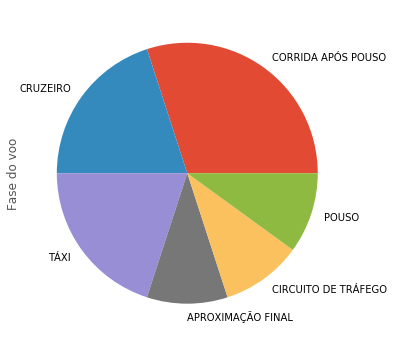

In [74]:
# Aqui será mostrado apenas as 10 principais fases de voo 
acidentes['aeronave_fase_voo'].head(10).value_counts().plot(kind='pie', subplots=True, label="Fase do voo" ,figsize=(6, 6))